# Instalando bibliotecas

In [ ]:
!pip install tensorflow
!pip install Keras

# Geral

No Jupyter Notebook vc executa uma célula com shift-enter

Vamos usar uma rede neural muito simples via a framework keras para fazer uma tarefa de classificação.
O problema que vamos tratar é bastante conhecido da comunidade de machine learning, e vai servir principalmente para nós concretizarmos o que foi visto em sala.
É importante que tenham o ambiente de execução configurado, como foi sugerido no começo do curso.
Nossa tarefa é projetar uma rede neural mlp de forma que ela consiga reconhecer dígitos escritos.
Keras já vem com uma base de datos destes dígitos para treinamento, ou seja, um tensor com ( imagens de dígitos, identificaçao do dígito) chamada de mnist.
Portanto a primeira coisa é importar no nosso código o keras ( façam isso onde a conexão de internet for boa )

In [ ]:
from keras.datasets import mnist
import keras
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'



A primeira etapa é obtermos os dados, como já foi dito o próprio keras tem estes dados que são muito usados por quem pratica machine learning.
Os dados são de treinamento da rede e de teste da rede

In [ ]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

Estes dados já estão bem arrumadinhos. Evidentemente quando estivermos lidando com dados reais há toda uma etapa de pre-processamento onde vamos verificar dados faltosos, dados fora de escala, dados errados etc..
Vamos ver o jeitão destes dados.

In [ ]:
print(train_images.shape)

(60000, 28, 28)


O primeiro componente mostra que de treino temos 60000 exemplos, cada um deles numa matriz de 28 x 28 ( que é a imagem ). Vamos olhar um,  plotando a imagem ,  o sexto exemplo:

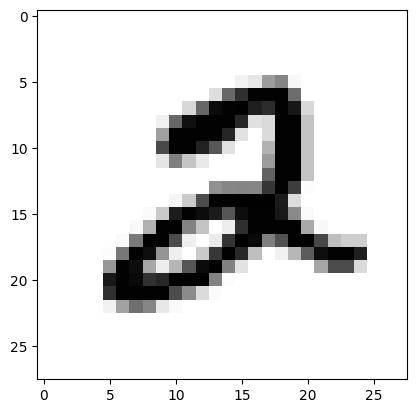

In [ ]:
digito = train_images[5]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()

Redes neurais lidam melhor com dados reais, e não inteiros como é o caso aqui.
Vamos converter num formato mais adequado ao processamento de redes

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_image_copy = test_images
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

Agora vem a questão do projeto da rede neural.
Decidimos que nosso modelo de machine learning será uma rede neural padrão ( mlp ).
O que precisamos ainda decidir é o número de camadas que esta rede terá, e como serão os neurônios desta rede. Como isso teremos fechada a questão da arquitetura da rede.
Nossa rede terá todos os neurônios conectados aos da próxima camada,  e todas as sinapses serão ajustadas numa camada, ou seja, uma típica MLP. Quem faz isso no keras é o modelo chamado sequencial.

In [ ]:
from keras import models
from keras import layers

rede = models.Sequential()

Agora é a questão da arquitetura propriamente dita : quantas camadas ( layers ) quantos neurônios por camada, que função de ativação estes neurônios vão usar..

In [ ]:
rede.add(layers.Dense(512,activation = 'sigmoid', input_shape = (28*28,) ))
rede.add(layers.Dense(10,activation='softmax'))

Então decidi por 1 camadas. A primeira (hidden) terá 512 neurônios com relu como função de ativação. E como é a primeira, portanto conectada ao input, informo como é um dado de entrada padrão : é 28x28
A segunda camada é a de saída, ela tem 10 neurônios pois a tarefa é discriminar, identificar uma imagem 28x28 como sendo um entre os dígitos de 0  a 9 .  A última camada usa uma função de ativação do tipo softmax, esta função de ativação funciona como uma probabilidade, ou seja, a rede vai estar respondendo qual é a probabilidade de que a imagem vista é o número n. Como são 10 números , haverá 10 probabilidades e a maior é a resposta da rede.


Arquitetura preparada, agora temos que cuidar do esquema de aprendizado, ou treinamento.
Vimos que se usa uma função custo. Uma função que vai indicar se a rede está se saindo bem num dado, ou mal.
Derivamos o algoritmo backpropagation usando uma função custo que era o erro médio quadrático da rede.
Para usar o keras com rede nossa função custo será a função loss, a mais adequada para tarefas de classificação como a nossa
é a de cross-entropia categorica.
loss = 'categorical_crossentropy'
E evidentemente precisamos de um "processo" através do qual usar esta informação da função custo para ajustar os pesos. Derivamos o famoso backpropagation em sala, que nada mais é que um cálculo de gradiente. Estamos então diante de um processo de otimização: achar as melhores sinapses que minimizam uma função custo.
Em keras configuramos que otimizador usar.
E temos que indicar também como otimizar, qual medida é  importante. A métrica

In [ ]:
rede.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Falta um detalhe, precisamos tratar também as respostas. Decidimos que a rede vai respoder probabilidades, mas os dados de treino tem outra forma : (28x28, digito)
Dígito, nos nossos dados , é um valor único. Mas a rede espera que sejam 10! A saída dela tem 10 neurônios, não 1

nos dados  , para esta imagem, a resposta é  2


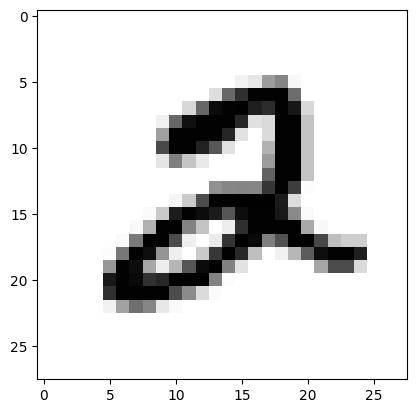

In [ ]:
plt.imshow(digito, cmap = plt.cm.binary)
print('nos dados  , para esta imagem, a resposta é ',train_labels[5])

Isso é fácil de resolver no nosso caso, keras ajuda também.
Vamos transformar os labels de dígitos para categorias

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print('Agora nosso 2, virou ', train_labels[5])

Agora nosso 2, virou  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Que é o que a rede espera, 10 respostas para seus 10 neurônios na última camada.

Resta-nos preparar o treinamento da rede.
Vamos empregar um esquema de treinamento conhecido com batch learning.
No batch learning a rede não processa todo o conjunto de treinamento de uma vez, ela quebra em subconjuntos chamados batchs.
Nossa rede vai usar batchs de tamanho 128.
Vamos treinar só por 5 épocas, onde uma época é o correspondente a apresentação de todos os dados de treino

In [ ]:
treino = rede.fit(train_images, train_labels, epochs=20, batch_size=128)


Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4591 - accuracy: 0.8758
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2673 - accuracy: 0.9214
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2157 - accuracy: 0.9370
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1766 - accuracy: 0.9479
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1467 - accuracy: 0.9579
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1236 - accuracy: 0.9646
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1059 - accuracy: 0.9696
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0923 - accuracy: 0.9735
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0811 - accuracy: 0.9765
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0717 - accuracy: 

A rede foi treinada! Esperemos...
O resultado do treino, no keras, fica num objeto chamado history.
É um dicionário { chave, valor }

In [ ]:
historia = treino.history

In [ ]:
print(historia.keys())

dict_keys(['loss', 'accuracy'])


O objeto historia do treino tem 2 elementos : acuracia e custo. Vamos plotar :

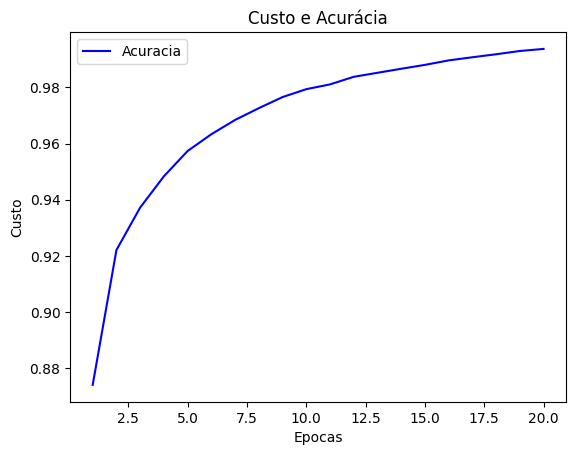

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

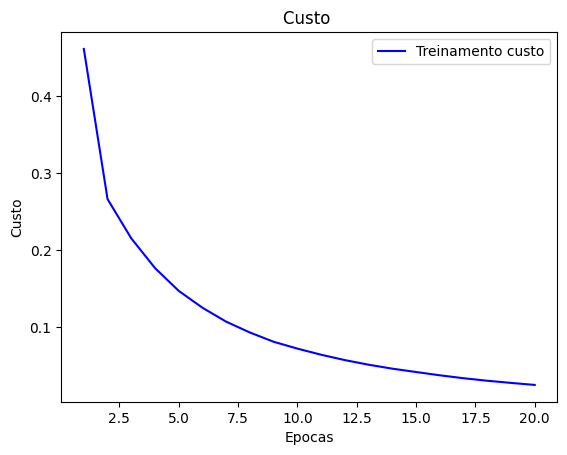

In [ ]:


loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
plt.plot(epochs, loss, 'b', label='Treinamento custo')
# b linha azul"
#plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo ')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

Temos uma rede que aprendeu a reconhecer dígitos numa imagem.
Agora ela pode ser usada em dados novos, nunca vistos por ela antes. Os dados de teste.

In [ ]:
respostas = rede.predict(test_images )



313/313 [==============================] - 1s 2ms/step


Para checar um dígito qualquer, vamos por a imagem de teste na forma que tínhamos no começo.

In [ ]:
imagem_escolhida = 3

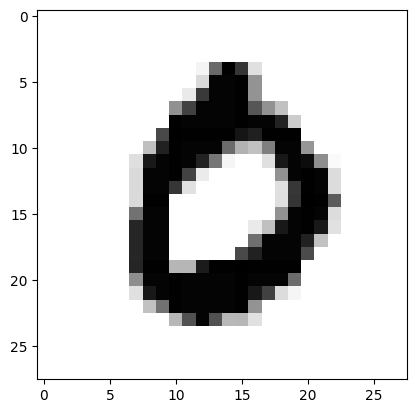

In [ ]:
digito = test_image_copy[imagem_escolhida]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()

In [ ]:
print(respostas[imagem_escolhida])

[9.9835908e-01 1.7693955e-07 4.2187597e-04 1.0655471e-05 4.7378177e-05
 3.7876882e-05 1.9335652e-04 9.0567220e-04 9.8753205e-08 2.3804509e-05]


In [ ]:
print('A maior probabilidade é: ',np.amax(respostas[imagem_escolhida]))
print('Imagem corresponde ao número: ', np.argmax(respostas[imagem_escolhida]))

A maior probabilidade é:  0.9983591
Imagem corresponde ao número:  0


TAREFAS :
reduza o número de épocas, retreine a rede e discuta a acurácia nos dados de treino e de teste
aumente muito o número de epocas (500), retreine, e discuta a acurácia nos dados de treino e teste.
Modifique a arquitetura ( mais camadas, mais neuronios por camada ) retreine e discuta a acurácia nos dados de treino e teste.
Entregar até 27/05 como relatório
Vale um ponto na média

In [ ]:
# menos epocas
treino = rede.fit(train_images, train_labels, epochs=2, batch_size=128)
historia = treino.history

print(historia.keys())

Epoch 1/2
469/469 [==============================] - 7s 14ms/step - loss: 0.0082 - accuracy: 0.9990
Epoch 2/2
469/469 [==============================] - 5s 10ms/step - loss: 0.0075 - accuracy: 0.9991
dict_keys(['loss', 'accuracy'])


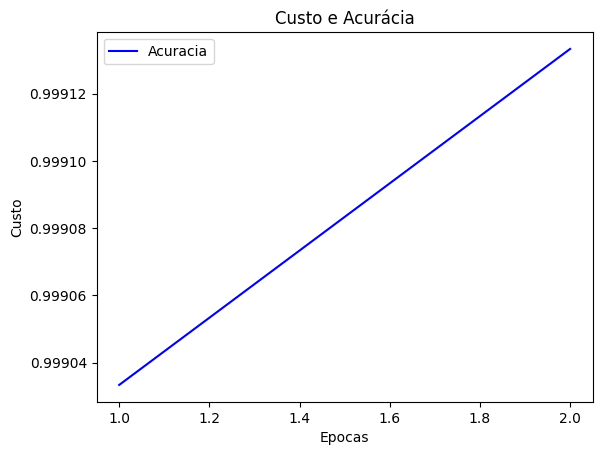

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

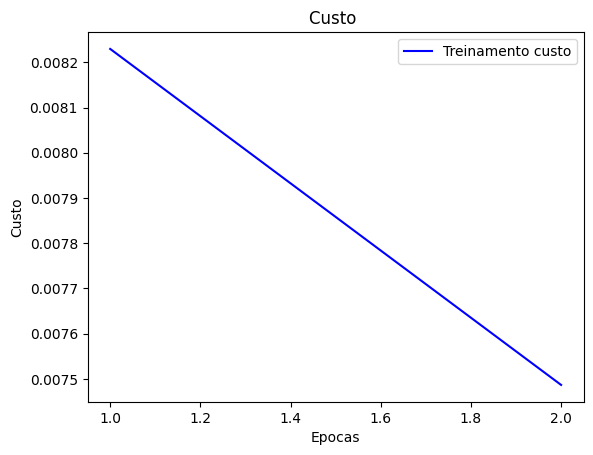

In [ ]:
loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
plt.plot(epochs, loss, 'b', label='Treinamento custo')
# b linha azul"
#plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo ')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

In [ ]:
respostas = rede.predict(test_images )
imagem_escolhida = 2

313/313 [==============================] - 1s 3ms/step


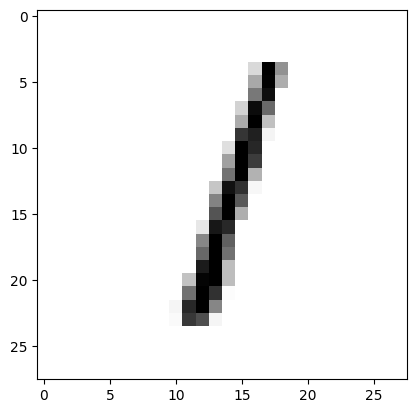

In [ ]:
digito = test_image_copy[imagem_escolhida]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()

In [ ]:
print(respostas[imagem_escolhida])

[6.41054720e-09 9.99871254e-01 2.51526908e-05 5.45984506e-07
 7.86916701e-07 2.61178093e-06 6.34253695e-07 1.32224695e-05
 8.55009202e-05 2.39969978e-07]


In [ ]:
print('A maior probabilidade é: ',np.amax(respostas[imagem_escolhida]))
print('Imagem corresponde ao número: ', np.argmax(respostas[imagem_escolhida]))

A maior probabilidade é:  0.99987125
Imagem corresponde ao número:  1


In [ ]:
# muitas epocas epocas
treino = rede.fit(train_images, train_labels, epochs=500, batch_size=128)
historia = treino.history

print(historia.keys())

Epoch 1/500
469/469 [==============================] - 9s 18ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 2/500
469/469 [==============================] - 9s 19ms/step - loss: 0.0062 - accuracy: 0.9994
Epoch 3/500
469/469 [==============================] - 8s 16ms/step - loss: 0.0056 - accuracy: 0.9994
Epoch 4/500
469/469 [==============================] - 5s 10ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 5/500
469/469 [==============================] - 7s 15ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 6/500
469/469 [==============================] - 6s 13ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 7/500
469/469 [==============================] - 8s 16ms/step - loss: 0.0038 - accuracy: 0.9997
Epoch 8/500
469/469 [==============================] - 6s 12ms/step - loss: 0.0036 - accuracy: 0.9997
Epoch 9/500
469/469 [==============================] - 7s 15ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 10/500
469/469 [==============================] - 5s 10ms/step - loss: 0.002

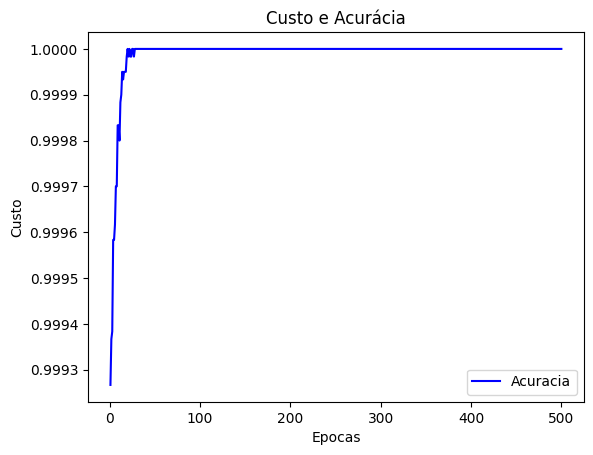

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

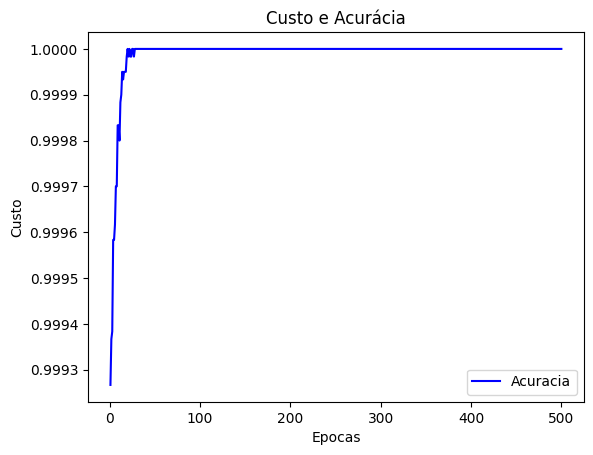

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


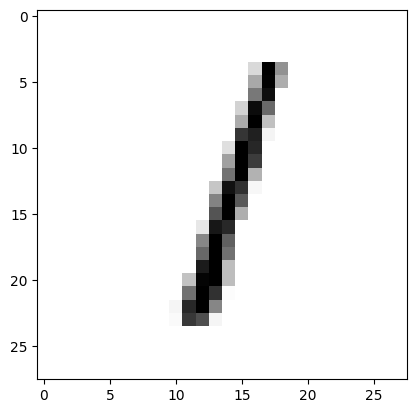

[1.3232340e-15 9.9999994e-01 2.6913971e-08 3.0662744e-13 6.6570451e-11
 9.8467352e-11 2.3289120e-12 1.5522145e-10 7.5120985e-09 6.1867212e-14]
A maior probabilidade é:  0.99999994
Imagem corresponde ao número:  1


In [ ]:
respostas = rede.predict(test_images )
imagem_escolhida = 2
digito = test_image_copy[imagem_escolhida]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()
print(respostas[imagem_escolhida])
print('A maior probabilidade é: ',np.amax(respostas[imagem_escolhida]))
print('Imagem corresponde ao número: ', np.argmax(respostas[imagem_escolhida]))

In [ ]:
# mais camadas e mais neuronios por camadas
rede.add(layers.Dense(300,activation = 'sigmoid', input_shape = (28*28,) ))
rede.add(layers.Dense(300,activation = 'sigmoid', input_shape = (28*28,) ))
rede.add(layers.Dense(300,activation = 'sigmoid', input_shape = (28*28,) ))
rede.add(layers.Dense(10,activation='softmax'))

In [ ]:

treino = rede.fit(train_images, train_labels, epochs=20, batch_size=128)
historia = treino.history

print(historia.keys())

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0226 - accuracy: 0.9947
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0203 - accuracy: 0.9952
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0183 - accuracy: 0.9960
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0162 - accuracy: 0.9967
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0150 - accuracy: 0.9973
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0133 - accuracy: 0.9975
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0120 - accuracy: 0.9980
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0110 - accuracy: 0.9982
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - accuracy: 0.9988
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0089 - accuracy: 0.9

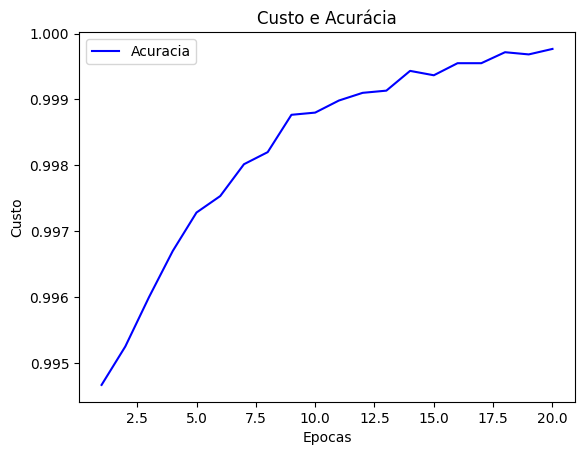

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

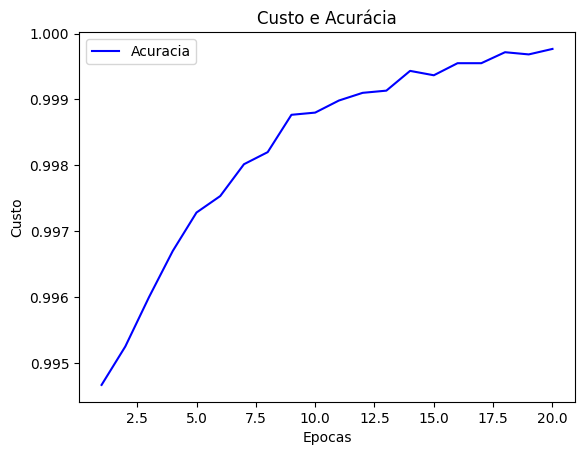

In [ ]:
import matplotlib.pyplot as plt

acc = treino.history['accuracy']

loss = treino.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" ponto azul
#plt.plot(epochs, loss, 'bo', label='Treinamento custo')
# b linha azul"
plt.plot(epochs, acc, 'b', label='Acuracia')
plt.title('Custo e Acurácia')
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.legend()

plt.show()

313/313 [==============================] - 1s 3ms/step


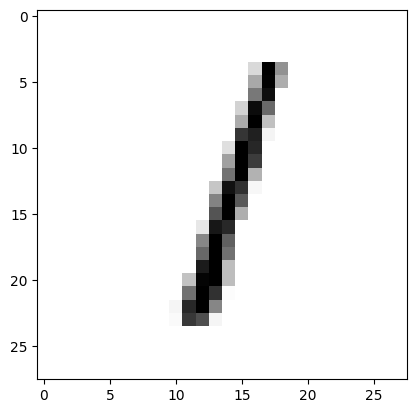

[0.09280481 0.09637658 0.08925247 0.06898561 0.10049641 0.1641672
 0.0996825  0.1430933  0.10389552 0.04124561]
A maior probabilidade é:  0.1641672
Imagem corresponde ao número:  5


In [ ]:
respostas = rede.predict(test_images )
imagem_escolhida = 2
digito = test_image_copy[imagem_escolhida]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digito, cmap = plt.cm.binary)
plt.show()
print(respostas[imagem_escolhida])
print('A maior probabilidade é: ',np.amax(respostas[imagem_escolhida]))
print('Imagem corresponde ao número: ', np.argmax(respostas[imagem_escolhida]))